# PRODUKSI PADI

# Simulasi awal menggunakan Linear Regression

Ubah data tersebut ke bentuk data terstruktur

Lakukan Split Ratio --> 70 : 30
Data Training 70% dan Data Testing 30%

Lakukan Training untuk mendapatkan model Linier Regresion untuk kasus perdiksi padi  tersebut!
Evaluasi model gunakan MSE, RMSE atau MAPE

### Load library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Load datasets

In [3]:
df = pd.read_excel('produksiPadi.xlsx', usecols=['Tahun', 'Produksi Padi(Ton)'])

### Sneak peak data

In [5]:
df

,Tahun,Produksi Padi(Ton)
0,1970,18693649.00
1,1971,20483687.00
2,1972,19393933.00
3,1973,21490578.00
4,1974,22476073.00
5,1975,22339455.00
6,1976,23300939.00
7,1977,23347132.00
8,1978,25771570.00
9,1979,26282663.00


In [6]:
df['Produksi -3'] = df['Produksi Padi(Ton)'].shift(3)
df['Produksi -2'] = df['Produksi Padi(Ton)'].shift(2)
df['Produksi -1'] = df['Produksi Padi(Ton)'].shift(1)

In [7]:
df

,Tahun,Produksi Padi(Ton),Produksi -3,Produksi -2,Produksi -1
0,1970,18693649.00,NaN,NaN,NaN
1,1971,20483687.00,NaN,NaN,18693649.00
2,1972,19393933.00,NaN,18693649.00,20483687.00
3,1973,21490578.00,18693649.00,20483687.00,19393933.00
4,1974,22476073.00,20483687.00,19393933.00,21490578.00
5,1975,22339455.00,19393933.00,21490578.00,22476073.00
6,1976,23300939.00,21490578.00,22476073.00,22339455.00
7,1977,23347132.00,22476073.00,22339455.00,23300939.00
8,1978,25771570.00,22339455.00,23300939.00,23347132.00
9,1979,26282663.00,23300939.00,23347132.00,25771570.00


In [8]:
df_lag = df.dropna()

In [9]:
df_lag

,Tahun,Produksi Padi(Ton),Produksi -3,Produksi -2,Produksi -1
3,1973,21490578.00,18693649.00,20483687.00,19393933.00
4,1974,22476073.00,20483687.00,19393933.00,21490578.00
5,1975,22339455.00,19393933.00,21490578.00,22476073.00
6,1976,23300939.00,21490578.00,22476073.00,22339455.00
7,1977,23347132.00,22476073.00,22339455.00,23300939.00
8,1978,25771570.00,22339455.00,23300939.00,23347132.00
9,1979,26282663.00,23300939.00,23347132.00,25771570.00
10,1980,29651905.00,23347132.00,25771570.00,26282663.00
11,1981,32774176.00,25771570.00,26282663.00,29651905.00
12,1982,33583677.00,26282663.00,29651905.00,32774176.00


- Penjelasan setiap kolom:
    1. X1 = Produksi -1
    2. X2 = Produksi -2
    3. X3 = Produksi -3
    4. Y = Produksi Padi(Ton)

In [10]:
#Mengetahui jumlah kolom dan baris dari data
df_lag.shape

(50, 5)

In [11]:
df_lag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 3 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               50 non-null     int64  
 1   Produksi Padi(Ton)  50 non-null     float64
 2   Produksi -3         50 non-null     float64
 3   Produksi -2         50 non-null     float64
 4   Produksi -1         50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


In [12]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df_lag.describe()

,Tahun,Produksi Padi(Ton),Produksi -3,Produksi -2,Produksi -1
count,50.00000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1997.50000,4.858644e+07,4.650206e+07,4.722117e+07,4.788755e+07
std,14.57738,1.530265e+07,1.671834e+07,1.626493e+07,1.582369e+07
min,1973.00000,2.149058e+07,1.869365e+07,1.939393e+07,1.939393e+07
25%,1985.25000,3.920640e+07,3.401353e+07,3.601144e+07,3.836057e+07
50%,1997.50000,5.010246e+07,4.873835e+07,4.930687e+07,4.956060e+07
75%,2009.75000,5.463791e+07,5.456676e+07,5.463791e+07,5.463791e+07
max,2022.00000,8.114862e+07,8.114862e+07,8.114862e+07,8.114862e+07


### Handling Missing Values

In [13]:
df_lag.isnull().sum()

Tahun                 0
Produksi Padi(Ton)    0
Produksi -3           0
Produksi -2           0
Produksi -1           0
dtype: int64

### Exploratory Data Analysis (EDA)

In [14]:
df_lag.head()

,Tahun,Produksi Padi(Ton),Produksi -3,Produksi -2,Produksi -1
3,1973,21490578.0,18693649.0,20483687.0,19393933.0
4,1974,22476073.0,20483687.0,19393933.0,21490578.0
5,1975,22339455.0,19393933.0,21490578.0,22476073.0
6,1976,23300939.0,21490578.0,22476073.0,22339455.0
7,1977,23347132.0,22476073.0,22339455.0,23300939.0


/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

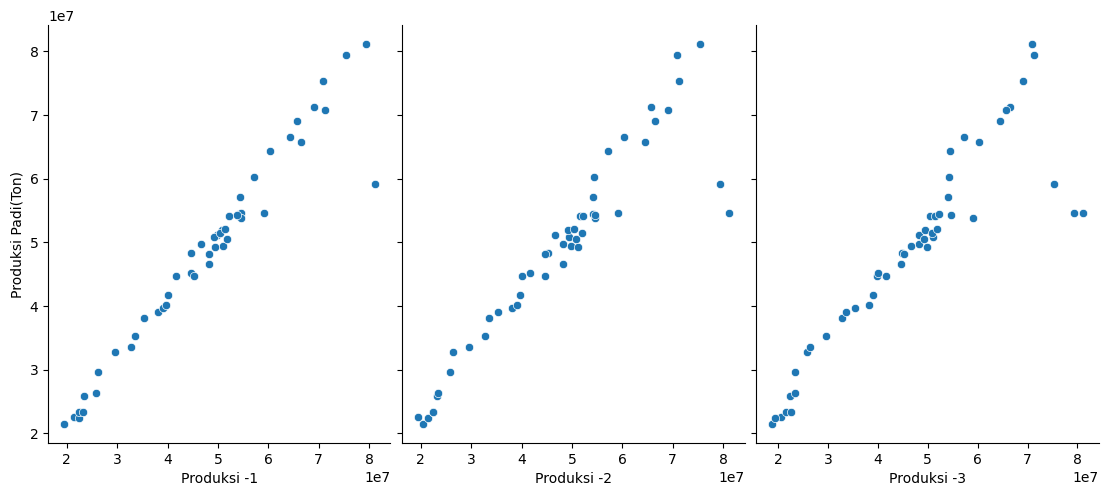

In [15]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df_lag, x_vars=['Produksi -1', 'Produksi -2', 'Produksi -3'], y_vars=['Produksi Padi(Ton)'], size=5, aspect=0.75)
plt.show()

In [16]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df_lag.corr().style.background_gradient().format(precision=2)

,Tahun,Produksi Padi(Ton),Produksi -3,Produksi -2,Produksi -1
Tahun,1.00,0.90,0.96,0.94,0.92
Produksi Padi(Ton),0.90,1.00,0.91,0.94,0.97
Produksi -3,0.96,0.91,1.00,0.97,0.94
Produksi -2,0.94,0.94,0.97,1.00,0.97
Produksi -1,0.92,0.97,0.94,0.97,1.00


### Modelling

In [17]:
#Recall data kita
df_lag.head()

,Tahun,Produksi Padi(Ton),Produksi -3,Produksi -2,Produksi -1
3,1973,21490578.0,18693649.0,20483687.0,19393933.0
4,1974,22476073.0,20483687.0,19393933.0,21490578.0
5,1975,22339455.0,19393933.0,21490578.0,22476073.0
6,1976,23300939.0,21490578.0,22476073.0,22339455.0
7,1977,23347132.0,22476073.0,22339455.0,23300939.0


In [18]:
#Pertama, buat variabel x dan y
x = df_lag.drop(columns=['Tahun','Produksi Padi(Ton)'])
y = df_lag['Produksi Padi(Ton)']

In [20]:
y

3     21490578.00
4     22476073.00
5     22339455.00
6     23300939.00
7     23347132.00
8     25771570.00
9     26282663.00
10    29651905.00
11    32774176.00
12    33583677.00
13    35303106.00
14    38136446.00
15    39032945.00
16    39726761.00
17    40078195.00
18    41676170.00
19    44725582.00
20    45178751.00
21    44688247.00
22    48240009.00
23    48181087.00
24    46641524.00
25    49744140.00
26    51101506.00
27    49377054.00
28    49236692.00
29    50866387.00
30    51898852.00
31    50460782.00
32    51489694.00
33    52137604.00
34    54088468.00
35    54151097.00
36    54454937.00
37    57157435.00
38    60325925.00
39    64398890.00
40    66469394.00
41    65756904.00
42    69056126.00
43    71279709.00
44    70846465.00
45    75397841.00
46    79354767.00
47    81148617.00
48    59101577.84
49    54604033.34
50    54649202.24
51    53802637.44
52    54338410.44
Name: Produksi Padi(Ton), dtype: float64

In [31]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [32]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35, 3)
(35,)
(15, 3)
(15,)


In [33]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [34]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [35]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.13715104 -0.34868934  1.14909966]
3647004.7512380257


In [36]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Produksi -3,0.137151
1,Produksi -2,-0.348689
2,Produksi -1,1.149100


- dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 3647004.7512380257 + 1.149100x1 + 0.348689x2 + 1.149100x3

In [37]:
y_pred = lin_reg.predict(x_test)

In [38]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.9838695767384078

- Model mendapatkan accuracy score sebesar 98.38%

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE (Root of MSE)
rmse = np.sqrt(mse)

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print hasilnya
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape * 100:.2f}%')  # dikalikan 100 agar dalam persen


MSE: 2295822493792.973
RMSE: 1515197.1798393016
MAPE: 3.45%


### Prediction
- Contoh Kasus (Prediksi Tahun 2023)
    1. Tahun -1 = 54338410,44
    2. Tahun -2 = 53802637,44
    3. Tahun -3 = 54649202,24

In [40]:
#Prediksi harga rumah idaman Joko
lin_reg.predict([[54338410.44,53802637.44,54649202.24]])

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55136547.30825189])

In [41]:
lin_reg.predict([[55136547.31, 54338410.44, 53802637.44]])

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54086406.95406873])

Nilai tahun 2023 adalah : 55136547.30825189
Nilai tahun 2024 adalah : 54086406.95406873

## Perbandingan menggunakan algoritma berbeda

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

               Model           MAE           MSE          RMSE        R2
0  Linear Regression  1.309144e+06  2.295822e+12  1.515197e+06  0.983870
1              ARIMA  1.067613e+07  2.072802e+14  1.439723e+07 -0.456349
2             SARIMA  1.764461e+07  4.995738e+14  2.235115e+07 -2.510000
3      Random Forest  1.794218e+06  3.889818e+12  1.972262e+06  0.972670
4            XGBoost  1.681645e+06  4.557646e+12  2.134864e+06  0.967978


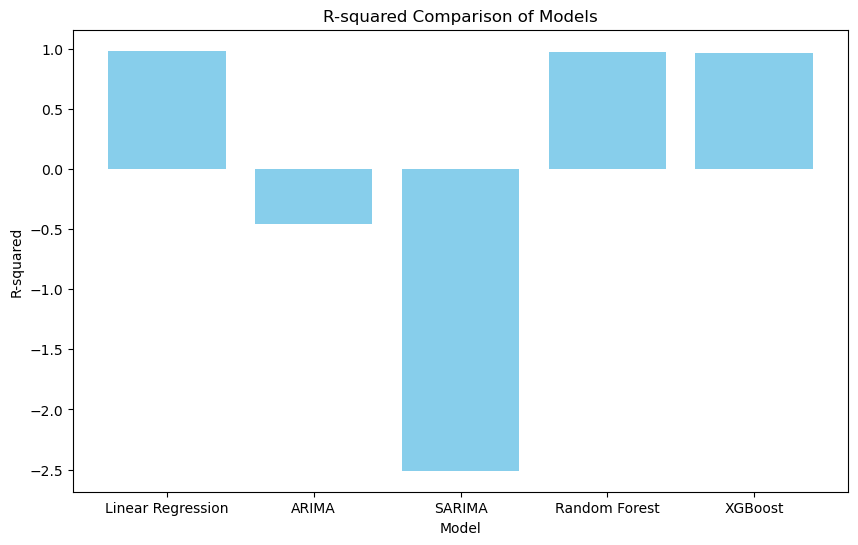

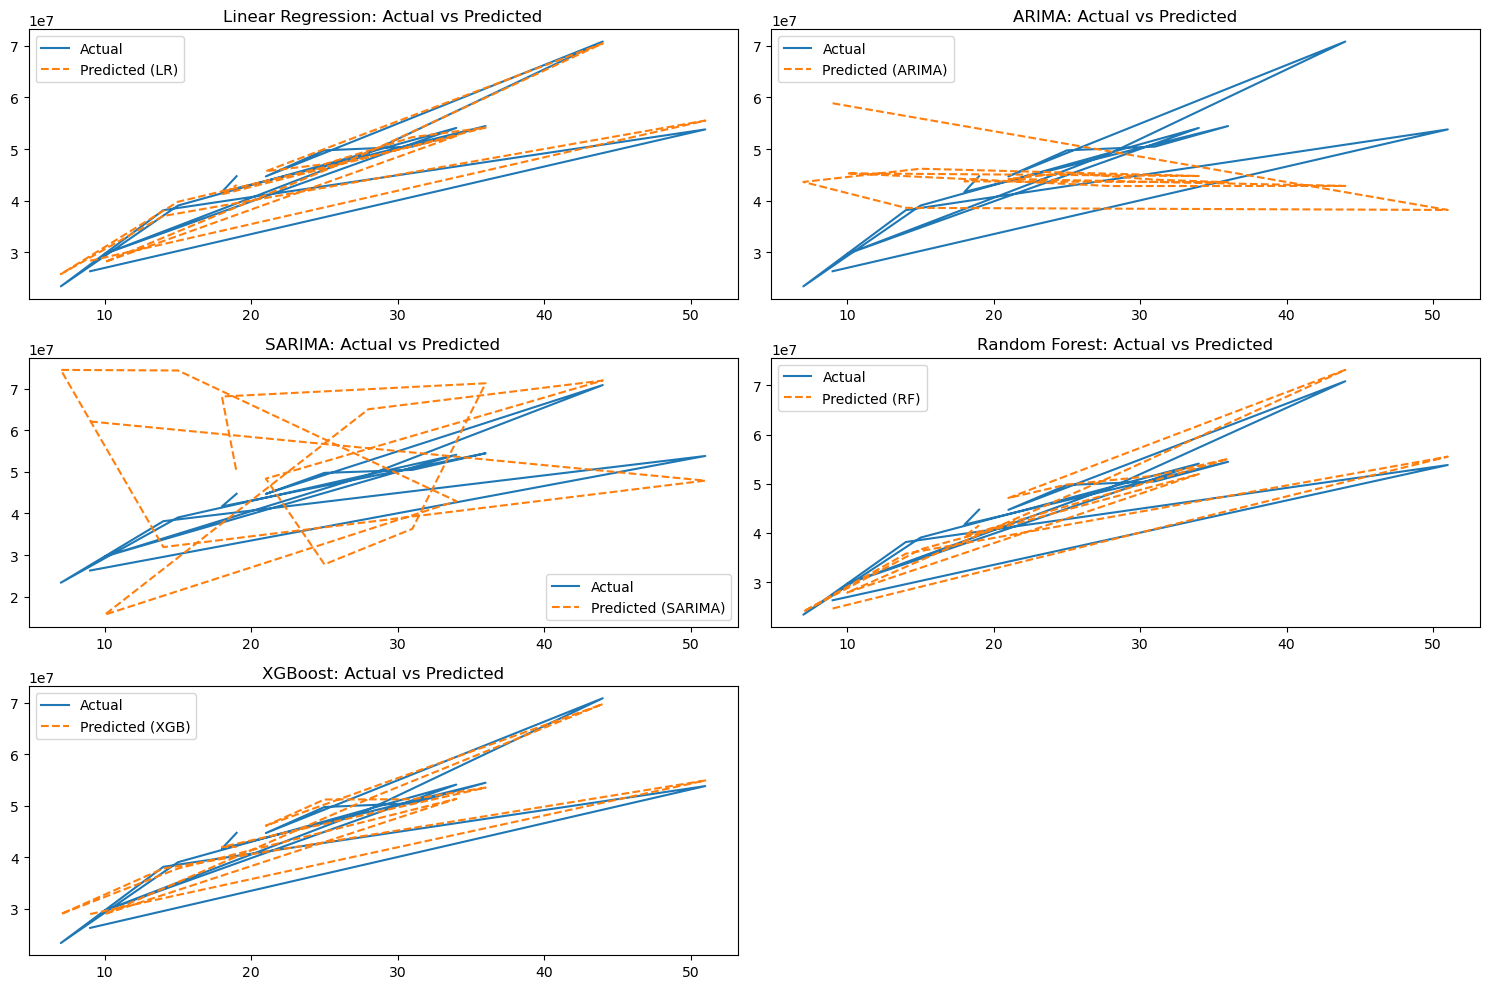

In [42]:
# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_lr = linear_model.predict(x_test)
mae_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# 2. ARIMA (p=5, d=1, q=0)
arima_model = ARIMA(y_train, order=(5,1,0))
arima_result = arima_model.fit()
y_pred_arima = arima_result.forecast(steps=len(y_test))
mae_arima, mse_arima, rmse_arima, r2_arima = evaluate_model(y_test, y_pred_arima)

# 3. SARIMA (p=5, d=1, q=0)(P=1, D=1, Q=1, S=12)
sarima_model = SARIMAX(y_train, order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
y_pred_sarima = sarima_result.forecast(steps=len(y_test))
mae_sarima, mse_sarima, rmse_sarima, r2_sarima = evaluate_model(y_test, y_pred_sarima)

# 4. Random Forest with Grid Search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# 5. XGBoost with Grid Search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=3)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

# Collect and display results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'ARIMA', 'SARIMA', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_arima, mae_sarima, mae_rf, mae_xgb],
    'MSE': [mse_lr, mse_arima, mse_sarima, mse_rf, mse_xgb],
    'RMSE': [rmse_lr, rmse_arima, rmse_sarima, rmse_rf, rmse_xgb],
    'R2': [r2_lr, r2_arima, r2_sarima, r2_rf, r2_xgb]
})

print(results)

# Plot R-squared Comparison
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['R2'], color='skyblue')
plt.title('R-squared Comparison of Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()

# Plot Actual vs Predicted for each model
plt.figure(figsize=(15, 10))

# Plot for Linear Regression
plt.subplot(3, 2, 1)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_lr, label='Predicted (LR)', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# Plot for ARIMA
plt.subplot(3, 2, 2)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_arima, label='Predicted (ARIMA)', linestyle='--')
plt.title('ARIMA: Actual vs Predicted')
plt.legend()

# Plot for SARIMA
plt.subplot(3, 2, 3)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_sarima, label='Predicted (SARIMA)', linestyle='--')
plt.title('SARIMA: Actual vs Predicted')
plt.legend()

# Plot for Random Forest
plt.subplot(3, 2, 4)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Predicted (RF)', linestyle='--')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

# Plot for XGBoost
plt.subplot(3, 2, 5)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_xgb, label='Predicted (XGB)', linestyle='--')
plt.title('XGBoost: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()